In [10]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib.pyplot import imread

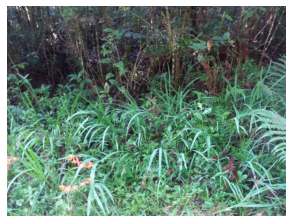

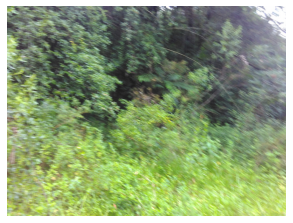

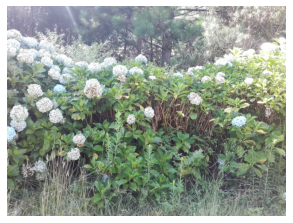

In [12]:
image=plt.imread('../dataset/train/1.jpg')
fig=plt.figure(figsize=(5,10))
_=plt.imshow(image)
_=plt.axis('off')

image=plt.imread('../dataset/train/2.jpg')
fig=plt.figure(figsize=(5,10))
_=plt.imshow(image)
_=plt.axis('off')

image=plt.imread('../dataset/train/3.jpg')
fig=plt.figure(figsize=(5,10))
_=plt.imshow(image)
_=plt.axis('off')

# Importing data and pre-processing
 

In [13]:
traindf=pd.read_csv('..//dataset/train_labels.csv',dtype=str)

def append_ext(fn):
    return fn+".jpg"

traindf["name"]=traindf["name"].apply(append_ext)
print(traindf)


          name invasive
0        1.jpg        0
1        2.jpg        0
2        3.jpg        1
3        4.jpg        0
4        5.jpg        1
...        ...      ...
2290  2291.jpg        1
2291  2292.jpg        1
2292  2293.jpg        1
2293  2294.jpg        1
2294  2295.jpg        1

[2295 rows x 2 columns]


# training dataset

In [15]:
train_data=ImageDataGenerator(rescale=1./255.,validation_split=0.25)
training_set=train_data.flow_from_dataframe(
dataframe=traindf,
directory="../dataset/train/",
x_col="name",
y_col="invasive",
subset="training",
batch_size=32,
seed=42,
shuffle=True,
class_mode="binary",
target_size=(128,128))

Found 1722 validated image filenames belonging to 2 classes.


# validation dataset

In [16]:
validation_dataset=train_data.flow_from_dataframe(
dataframe=traindf,
directory="../dataset/train/",
x_col="name",
y_col="invasive",
subset="validation",
batch_size=32,
seed=42,
shuffle=True,
class_mode="binary",
target_size=(128,128))

Found 573 validated image filenames belonging to 2 classes.


# Preprocessing the Test set - Building the CNN


In [17]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

# Training

In [19]:
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

cnn.fit(x = training_set,validation_data = validation_dataset, epochs=20)

Epoch 1/20
54/54 [==============================] - 123s 2s/step - loss: 0.7655 - accuracy: 0.6138 - val_loss: 0.6096 - val_accuracy: 0.6318
Epoch 2/20
54/54 [==============================] - 107s 2s/step - loss: 0.5417 - accuracy: 0.6928 - val_loss: 0.5169 - val_accuracy: 0.7801
Epoch 3/20
54/54 [==============================] - 102s 2s/step - loss: 0.4225 - accuracy: 0.7997 - val_loss: 0.4046 - val_accuracy: 0.8098
Epoch 4/20
54/54 [==============================] - 113s 2s/step - loss: 0.3353 - accuracy: 0.8531 - val_loss: 0.4754 - val_accuracy: 0.7801
Epoch 5/20
54/54 [==============================] - 105s 2s/step - loss: 0.2733 - accuracy: 0.8902 - val_loss: 0.4386 - val_accuracy: 0.8080
Epoch 6/20
54/54 [==============================] - 107s 2s/step - loss: 0.2166 - accuracy: 0.9141 - val_loss: 0.3954 - val_accuracy: 0.8185
Epoch 7/20
54/54 [==============================] - 108s 2s/step - loss: 0.1691 - accuracy: 0.9379 - val_loss: 0.4811 - val_accuracy: 0.8080
Epoch 8/20
54

# Testing on a sample


In [21]:
from keras.preprocessing import image

test_img = image.load_img('../dataset/test/34.jpg', target_size = (128, 128))
test_img = image.img_to_array(test_img)
# extra dimension added to make a 'batch' with one image in it, axis : where do you want to add the extra dimension
test_img = np.expand_dims(test_img, axis = 0)
result = cnn.predict(test_img)
training_set.class_indices
# [0][0] because result is also in a batch
if result[0][0] == 1: 
  prediction = 'present'
else:
  prediction = 'absent'

print(prediction)

present


# Predicting results for the test set


In [22]:
batch_result = []

for i in range(1,1532):
  test_img = image.load_img('../dataset/test/' + str(i) + '.jpg', target_size = (128, 128))
  test_img = image.img_to_array(test_img)
  # extra dimension added to make a 'batch' with one image in it, axis : where do you want to add the extra dimension
  test_img = np.expand_dims(test_img, axis = 0)
  result = cnn.predict(test_img)
  batch_result.append({'name': i, 'invasive': result[0][0]})


print(batch_result)

[{'name': 1, 'invasive': 1.0}, {'name': 2, 'invasive': 0.0}, {'name': 3, 'invasive': 1.0}, {'name': 4, 'invasive': 0.9989665}, {'name': 5, 'invasive': 1.0}, {'name': 6, 'invasive': 1.0}, {'name': 7, 'invasive': 1.0}, {'name': 8, 'invasive': 1.0}, {'name': 9, 'invasive': 1.0}, {'name': 10, 'invasive': 0.0}, {'name': 11, 'invasive': 1.0}, {'name': 12, 'invasive': 1.0}, {'name': 13, 'invasive': 0.0}, {'name': 14, 'invasive': 1.0}, {'name': 15, 'invasive': 0.0}, {'name': 16, 'invasive': 1.0}, {'name': 17, 'invasive': 1.0}, {'name': 18, 'invasive': 1.0}, {'name': 19, 'invasive': 1.0}, {'name': 20, 'invasive': 0.0}, {'name': 21, 'invasive': 1.0}, {'name': 22, 'invasive': 0.0}, {'name': 23, 'invasive': 0.0}, {'name': 24, 'invasive': 1.0}, {'name': 25, 'invasive': 1.0}, {'name': 26, 'invasive': 1.0}, {'name': 27, 'invasive': 1.0}, {'name': 28, 'invasive': 1.0}, {'name': 29, 'invasive': 0.0}, {'name': 30, 'invasive': 0.00016313791}, {'name': 31, 'invasive': 0.0}, {'name': 32, 'invasive': 0.0}, 

In [24]:
result_df = pd.DataFrame(batch_result)
result_df.to_csv('submission.csv', index=False)


In [28]:
submission = pd.read_csv("submission.csv")


In [30]:
submission.head()


,name,invasive
0,1,1.000000
1,2,0.000000
2,3,1.000000
3,4,0.998967
4,5,1.000000
